In [1]:
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from IPython.display import display, HTML

IMPORT DATA

In [25]:
# Load the data with the specific file path and sheet name
file_path = "Gamma-review.xlsx"
sheet_name = "C_B_H_A"

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows
print("Original Data Preview:")
display(df.head())

Original Data Preview:


,C_E_R_F,C_E_R_C,C_E_R_T,C_E_R_P,C_E_R_O,C_E_L_F,C_E_L_C,C_E_L_T,C_E_L_P,C_E_L_O,...,D_I_R_F,D_I_R_C,D_I_R_T,D_I_R_P,D_I_R_O,D_I_L_F,D_I_L_C,D_I_L_T,D_I_L_P,D_I_L_O
0,0.081815,0.074741,0.165486,0.070367,0.043576,0.143509,0.116139,0.084806,0.119409,0.079866,...,0.090655,0.072881,0.009667,0.126890,0.140799,0.142966,0.106333,0.046064,0.153592,0.141647
1,0.030169,-0.075507,-0.098771,-0.059411,-0.060233,-0.061244,-0.293378,-0.110390,-0.070241,-0.035715,...,0.079223,0.113318,0.152134,0.143619,0.154758,0.111381,-0.017043,-0.046827,0.049416,0.019216
2,-0.092225,-0.124846,-0.145282,-0.187667,-0.149909,-0.090897,-0.165636,-0.153481,-0.199026,-0.134358,...,-0.290587,-0.241358,-0.180206,-0.241989,-0.166168,-0.338259,-0.302161,-0.248766,-0.277653,-0.229503
3,0.056266,0.079106,0.087020,0.027224,0.022359,0.048411,0.111361,0.089331,0.054644,-0.026405,...,-0.054755,-0.090627,-0.012037,-0.079734,-0.060660,0.028239,-0.001920,0.015069,-0.047790,-0.023880
4,0.044714,-0.208551,-0.047411,0.087334,0.121468,0.162123,0.286742,0.088822,0.145805,0.093156,...,-0.012504,-0.064893,-0.104848,-0.010595,-0.007142,0.028756,-0.034634,-0.051107,-0.072795,-0.011367


In [26]:
# Reshape the data: Convert wide format to long format
df_long = df.melt(var_name="Factor_Combination", value_name="Value")

# Extract factor levels from column names
df_long[['Condition', 'Background','Hemisphere', 'Area']] = df_long['Factor_Combination'].str.split('_', expand=True)

# Drop the original column name field
df_long.drop(columns=['Factor_Combination'], inplace=True)

# Convert categorical variables
df_long['Condition'] = df_long['Condition'].map({'C': 'Convergent', 'D': 'Divergent'})
df_long['Background'] = df_long['Background'].map({'E': 'EDs', 'I': 'IDEs'})
df_long['Hemisphere'] = df_long['Hemisphere'].map({'R': 'Right', 'L': 'Left'})
df_long['Area'] = df_long['Area'].map({'F': 'Frontal', 'C': 'Central', 'T': 'Temporal', 'P': 'Parietal', 'O': 'Occipital'})


# Display the transformed dataset
df_long.head()

,Value,Condition,Background,Hemisphere,Area
0,0.081815,Convergent,EDs,Right,Frontal
1,0.030169,Convergent,EDs,Right,Frontal
2,-0.092225,Convergent,EDs,Right,Frontal
3,0.056266,Convergent,EDs,Right,Frontal
4,0.044714,Convergent,EDs,Right,Frontal


In [1]:
# Check missing values by each combination of factors
missing_by_combination = df_long[df_long['Value'].isna()]

# Check the number of occurrences for each combination of factors
factor_counts = df_long.groupby(['Condition', 'Background', 'Hemisphere', 'Area']).size().reset_index(name='Counts')

# Display combinations with no data
empty_combinations = factor_counts[factor_counts['Counts'] == 0]
print(empty_combinations)

# Remove rows with missing values
df_long_clean = df_long.dropna(subset=['Condition', 'Background', 'Hemisphere', 'Area', 'Value'])

group_sizes = df_long.groupby(['Condition', 'Background', 'Hemisphere', 'Area']).size().reset_index(name='Sample_Count')

NameError: name 'df_long' is not defined

In [34]:
# Run the ANOVA test
anova_results = pg.anova(
    dv="Value",
    between=["Condition", "Background", "Hemisphere", "Area"],
    data=df_long_clean,
    detailed=True
)

# Display results
print(anova_results)

                                        Source          SS       DF  \
0                                    Condition   24.793762      1.0   
1                                   Background    6.673558      1.0   
2                                   Hemisphere    0.007442      1.0   
3                                         Area    0.099332      4.0   
4                       Condition * Background    1.206946      1.0   
5                       Condition * Hemisphere    0.001068      1.0   
6                      Background * Hemisphere    0.002351      1.0   
7                             Condition * Area    0.152959      4.0   
8                            Background * Area    0.088056      4.0   
9                            Hemisphere * Area    0.045317      4.0   
10         Condition * Background * Hemisphere    0.011819      1.0   
11               Condition * Background * Area    0.101248      4.0   
12               Condition * Hemisphere * Area    0.026102      4.0   
13    

In [35]:
anova_results['Effect Size (η²)'] = anova_results['SS'] / anova_results['SS'].sum()
display(anova_results)

,Source,SS,DF,MS,F,p-unc,np2,Effect Size (η²)
0,Condition,24.793762,1.0,24.793762,563.124050,1.258071e-121,0.045808,0.045105
1,Background,6.673558,1.0,6.673558,151.572036,1.285215e-34,0.012757,0.012140
2,Hemisphere,0.007442,1.0,0.007442,0.169022,6.809900e-01,0.000014,0.000014
3,Area,0.099332,4.0,0.024833,0.564016,6.887837e-01,0.000192,0.000181
4,Condition * Background,1.206946,1.0,1.206946,27.412556,1.672022e-07,0.002332,0.002196
5,Condition * Hemisphere,0.001068,1.0,0.001068,0.024253,8.762454e-01,0.000002,0.000002
6,Background * Hemisphere,0.002351,1.0,0.002351,0.053393,8.172647e-01,0.000005,0.000004
7,Condition * Area,0.152959,4.0,0.038240,0.868512,4.818686e-01,0.000296,0.000278
8,Background * Area,0.088056,4.0,0.022014,0.499987,7.357684e-01,0.000170,0.000160
9,Hemisphere * Area,0.045317,4.0,0.011329,0.257311,9.053231e-01,0.000088,0.000082


In [15]:
import pingouin as pg

# List of factors
factors = ['Condition', 'Background', 'Hemisphere', 'Area']

# Run Tukey post-hoc test for each factor
posthoc_results = {}
for factor in factors:
    posthoc = pg.pairwise_tukey(
        data=df_long, 
        dv="Value", 
        between=[factor]
    )
    posthoc_results[factor] = posthoc
    display(posthoc)


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Convergent,Divergent,0.082202,-0.010535,0.092737,0.003911,23.708945,3.032685e-12,0.439073


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,EDs,IDEs,0.010422,0.059564,-0.049141,0.004004,-12.274594,3.032685e-12,-0.228751


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Left,Right,0.032177,0.030587,0.00159,0.003985,0.399048,0.689865,0.007356


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Central,Frontal,0.028227,0.034587,-0.006360,0.006302,-1.009274,0.851235,-0.028319
1,Central,Occipital,0.028227,0.034308,-0.006081,0.006302,-0.965020,0.870862,-0.027384
2,Central,Parietal,0.028227,0.032011,-0.003784,0.006302,-0.600461,0.975050,-0.016984
3,Central,Temporal,0.028227,0.027775,0.000452,0.006302,0.071801,0.999994,0.002012
4,Frontal,Occipital,0.034587,0.034308,0.000279,0.006302,0.044254,0.999999,0.001324
5,Frontal,Parietal,0.034587,0.032011,0.002576,0.006302,0.408812,0.994143,0.012186
6,Frontal,Temporal,0.034587,0.027775,0.006812,0.006302,1.081075,0.816389,0.031893
7,Occipital,Parietal,0.034308,0.032011,0.002297,0.006302,0.364559,0.996237,0.011006
8,Occipital,Temporal,0.034308,0.027775,0.006534,0.006302,1.036821,0.838293,0.030972
9,Parietal,Temporal,0.032011,0.027775,0.004236,0.006302,0.672262,0.962389,0.020010


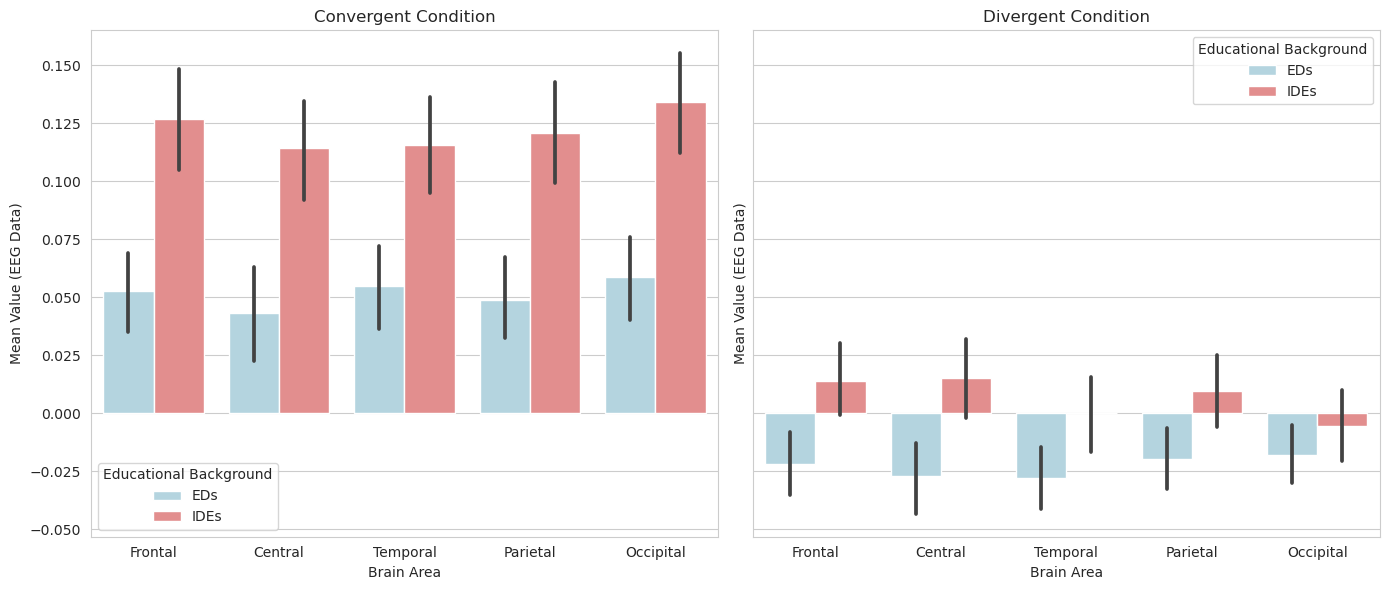

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}

# Get unique conditions and areas
conditions = df_long["Condition"].unique()
areas = df_long["Area"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Area, colored by Education)
    sns.barplot(
        data=subset,
        x="Area",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Brain Area")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with soft colors as an image file
plt.savefig("Gamma_TRPs_by_Area-coloured-soft.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

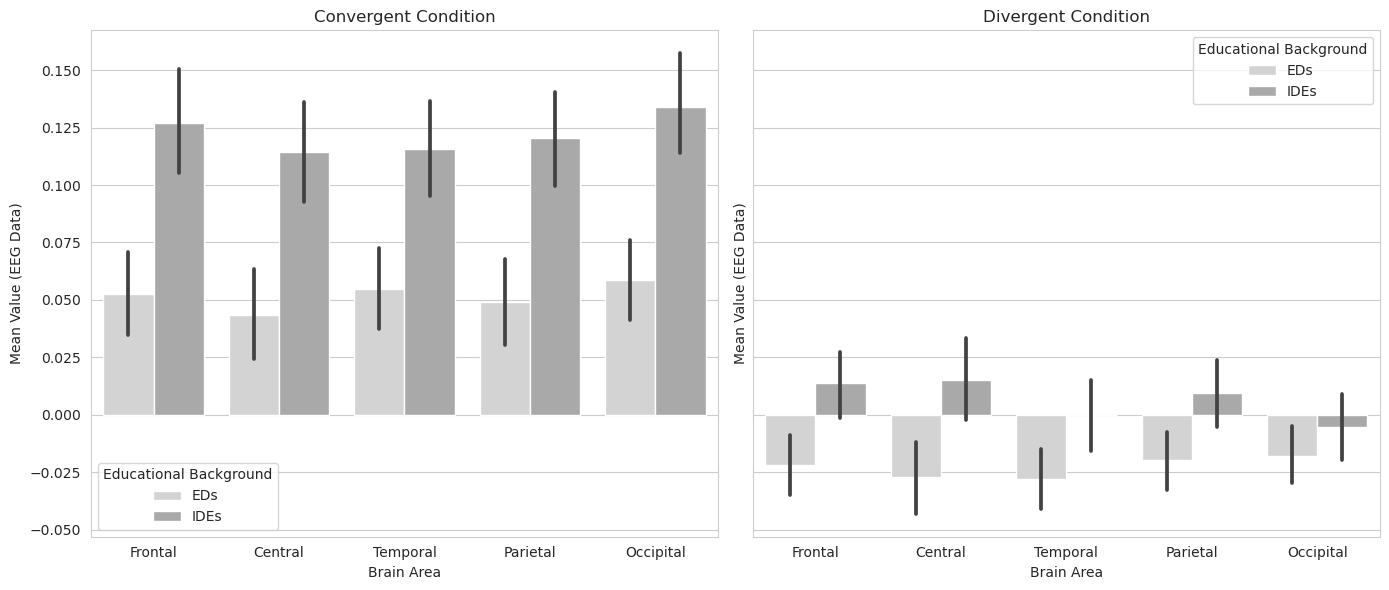

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define grayscale colors for Education backgrounds (using light grey for "EDs" and dark grey for "IDEs")
education_colors = {"EDs": "lightgrey", "IDEs": "darkgrey"}

# Get unique conditions and areas
conditions = df_long["Condition"].unique()
areas = df_long["Area"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Area, colored by Education in grayscale)
    sns.barplot(
        data=subset,
        x="Area",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Brain Area")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

plt.savefig("Gamma_TRPs_by_Area_greyScale.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

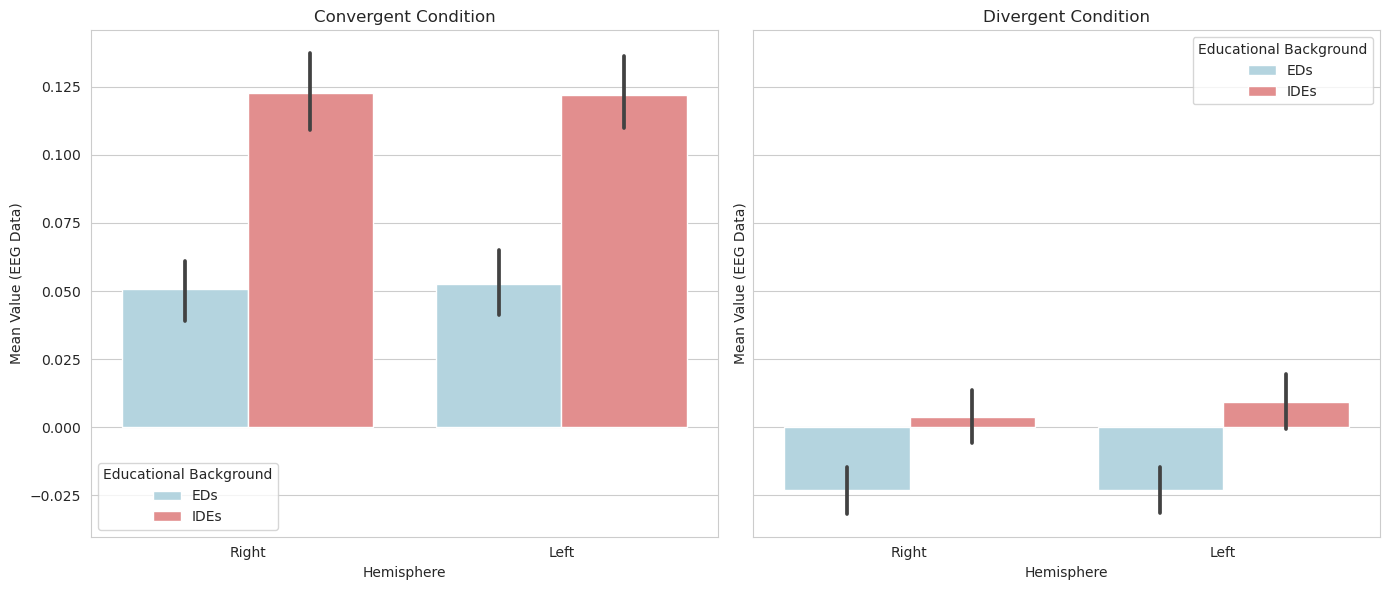

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}

# Get unique conditions
conditions = df_long["Condition"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Hemisphere, colored by Education)
    sns.barplot(
        data=subset,
        x="Hemisphere",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Hemisphere")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with hemisphere on the x-axis as an image file
plt.savefig("Gamma_TRPs_by_Hemisphere-coloured-soft.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()

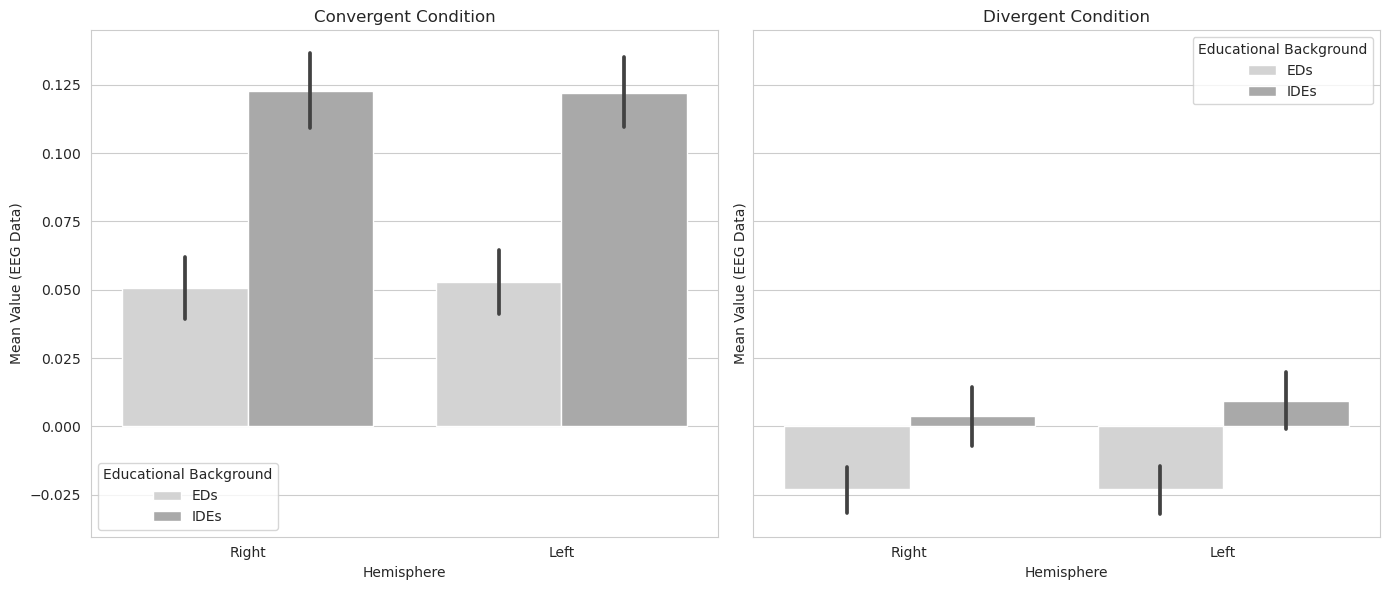

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define grey scale colors for Education backgrounds
education_colors = {"EDs": "lightgrey", "IDEs": "darkgrey"}

# Get unique conditions
conditions = df_long["Condition"].unique()

# Create subplots: One for each condition
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

for idx, condition in enumerate(conditions):
    ax = axes[idx]  # Select subplot
    
    # Filter data for this condition
    subset = df_long[df_long["Condition"] == condition]
    
    # Create a bar plot (grouped by Hemisphere, colored by Education)
    sns.barplot(
        data=subset,
        x="Hemisphere",
        y="Value",
        hue="Background",
        palette=education_colors,
        dodge=True,  # Ensures bars are side-by-side, not stacked
        ax=ax
    )
    
    # Titles and labels
    ax.set_title(f"{condition} Condition", fontsize=12)
    ax.set_xlabel("Hemisphere")
    ax.set_ylabel("Mean Value (EEG Data)")
    ax.legend(title="Educational Background")

# Save the plot with hemisphere on the x-axis as an image file
plt.savefig("Gamma_TRPs_by_Hemisphere-grayscale.png", dpi=300)

# Adjust layout and display
plt.tight_layout()
plt.show()